# Normalizing Flows using Pyro

## Approximating Lognormal distribution

In [9]:
# Lognormal
## X \sim N(0,1)
## Y \sim exp(X) = lognormal(0,1)

import torch
import pyro
import pyro.distributions as dist
import pyro.distributions.transforms as T # A variety of bijective transformations live in the pyro.distributions.transforms module
import matplotlib.pyplot as plt
import seaborn as sns
import os
smoke_test = ('CI' in os.environ)


# First, we create a base distribution for X. In this case, we'll use the standard normal:
dist_x = dist.Normal(torch.zeros(1), torch.ones(1))

# Next, we define the transform (here, the exponential function) and the distribution Y:
exp_transform = T.ExpTransform()

# Now, we can simply apply the transform to the base distribution to create a transformed distribution:
dist_y = dist.TransformedDistribution(dist_x, [exp_transform]) # Note that we don't need to compute the Jacobian ourselves!

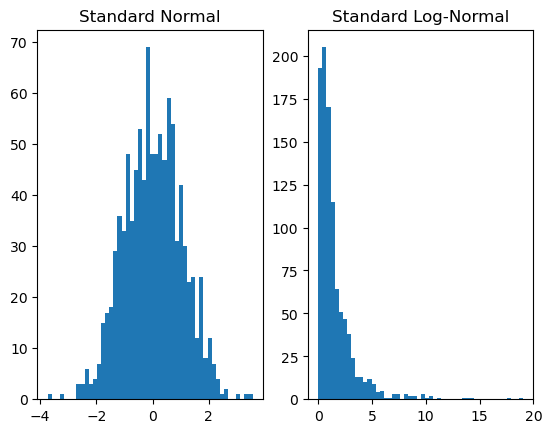

In [10]:
plt.subplot(1, 2, 1)
plt.hist(dist_x.sample([1000]).numpy(), bins=50)
plt.title('Standard Normal')
plt.subplot(1, 2, 2)
plt.hist(dist_y.sample([1000]).numpy(), bins=50)
plt.title('Standard Log-Normal')
plt.show()

## Affine Transformation (General Lognormal)

\begin{aligned}
& X \sim \mathcal{N}(0,1) \\
& Y=\exp (\mu+\sigma X)
\end{aligned}

or rather, $Y \sim \log \operatorname{Normal}\left(\mu, \sigma^2\right)$. In Pyro this is accomplished, e.g. for $\mu=3, \sigma=0.5$, as follows:

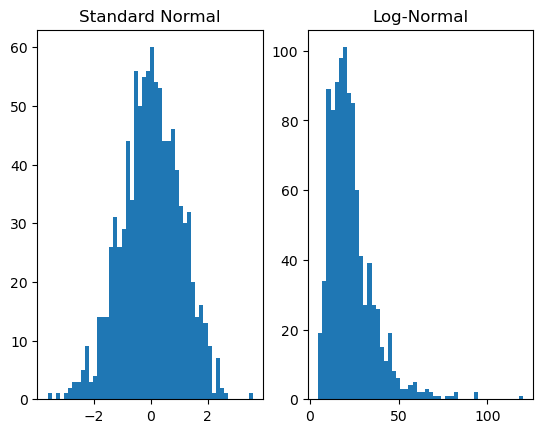

In [8]:
dist_x = dist.Normal(torch.zeros(1), torch.ones(1))
affine_transform = T.AffineTransform(loc=3, scale=0.5)
exp_transform = T.ExpTransform()
dist_y = dist.TransformedDistribution(dist_x, [affine_transform, exp_transform])

plt.subplot(1, 2, 1)
plt.hist(dist_x.sample([1000]).numpy(), bins=50)
plt.title('Standard Normal')
plt.subplot(1, 2, 2)
plt.hist(dist_y.sample([1000]).numpy(), bins=50)
plt.title('Log-Normal')
plt.show()

# Learnable Transformation

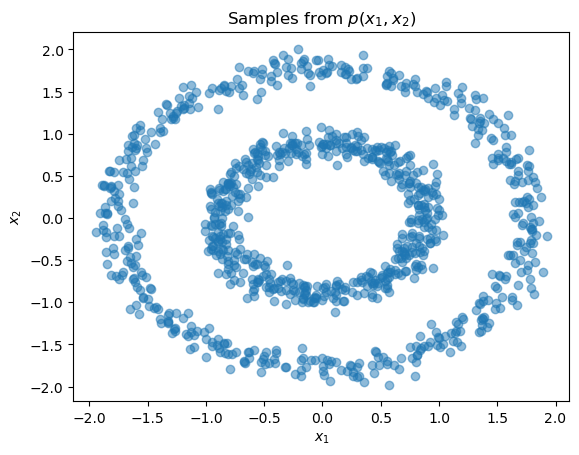

/Users/syyun/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/syyun/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


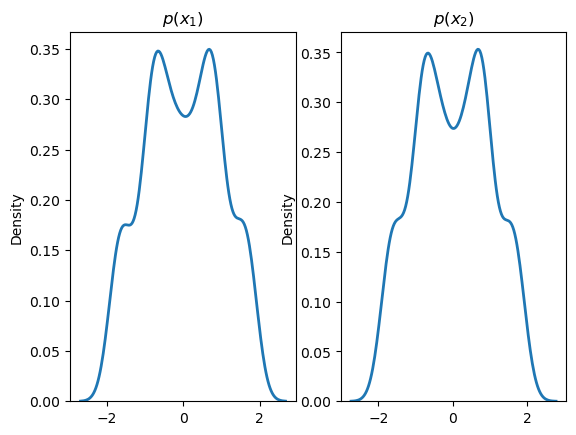

In [11]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

n_samples = 1000
X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
X = StandardScaler().fit_transform(X)

plt.title(r'Samples from $p(x_1,x_2)$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.show()

plt.subplot(1, 2, 1)
sns.distplot(X[:,0], hist=False, kde=True,
             bins=None,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title(r'$p(x_1)$')
plt.subplot(1, 2, 2)
sns.distplot(X[:,1], hist=False, kde=True,
             bins=None,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title(r'$p(x_2)$')
plt.show()

So, how can we approximate such distribution starting from a simple distribution?